![Consulting](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/newhousesforsales.JPG)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
import matplotlib.pyplot as plt
import keras as kr
import sklearn.preprocessing as pre
import sklearn.decomposition as dec
from scipy.stats import kurtosis, skew
import sklearn.model_selection as mod
# Import linear_model from sklearn
import sklearn.linear_model as lm
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline

In [4]:
boston = load_boston()
data = boston.data
data = pd.DataFrame(data = data, columns= boston.feature_names)
data['Price'] = boston.target

In [5]:
# Set global parameter for using ggplot plotting style
plt.style.use('ggplot')
# Set the size of plots
plt.rcParams['figure.figsize'] = 14, 10

# Introduction

The boston housing dataset contains information collected by the U.S. Census Service relating to housing in the Boston area. IT is very famous and has been used extensively to benchmark algorithms. It was originally part of the UCI Machine Learning Repository. The dataset is quite small in size and contains only 506 cases with 14 attributes.

We can now access this dataset in the scikit-learn library. This library contains 506 samples and 13 feature variables. The goal is to predict the price of the houses using the given features. In the below section, I am using the scikit learn library to describe the contents contained within thin this datset. [Ref: Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston = load_boston()
print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR) #get a description of the dataset

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

Create a git repository and make it available online for the lecturer
to clone. The repository should contain all your work for this assessment. Within
the repository, create a jupyter [6] notebook that uses descriptive statistics and
plots to describe the Boston House Prices [1] dataset. This part is worth 20% of
your overall mark.

# Describe

Descriptive statistics is the term given to the analysis of data that helps describe, show or summarize data in a meaningful way such that, for example, patterns might emerge from the data. Descriptive statistics do not, however, allow us to make conclusions beyond the data we have analysed or reach conclusions regarding any hypotheses we might have made. They are simply a way to describe our data.[Ref: Descriptive Statistics](https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php)

There are four major types of descriptive statistics [Ref: Types of Descriptive Statistics](https://baselinesupport.campuslabs.com/hc/en-us/articles/204305665-Types-of-Descriptive-Statistics)

1. Measures of Frequency
2. Measures of Central Tendency
3. Measures of Dispersion or Variation
4. Measures of Position

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### 1. Measures of Frequency

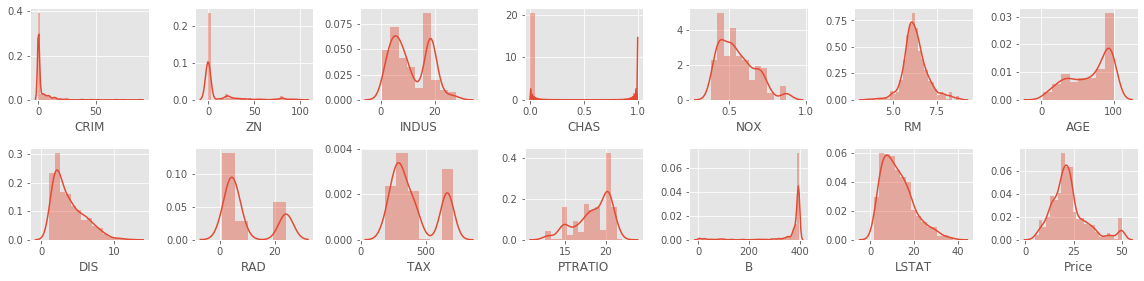

In [9]:
rows = 2
cols = 7

fig, ax  = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

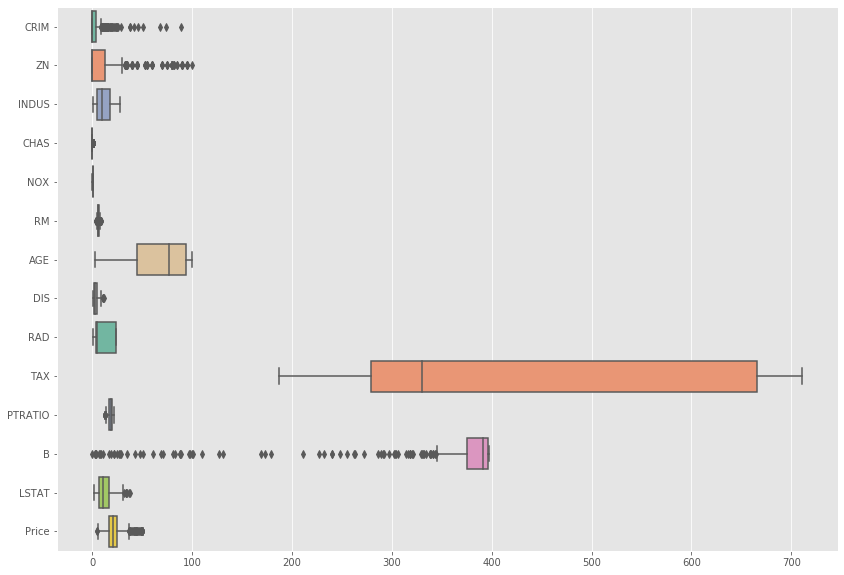

In [10]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

In [11]:
type(boston)

sklearn.utils.Bunch

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [15]:
data = boston.data
type(data)

numpy.ndarray

In [16]:
data = pd.DataFrame(data = data, columns= boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


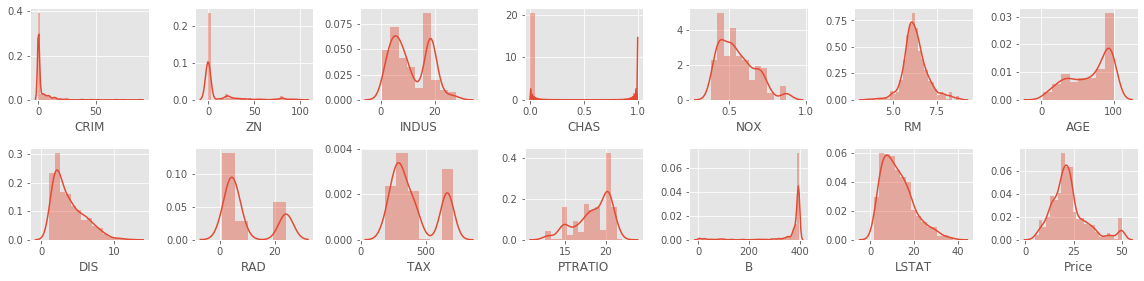

In [18]:
rows = 2
cols = 7

fig, ax  = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [20]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


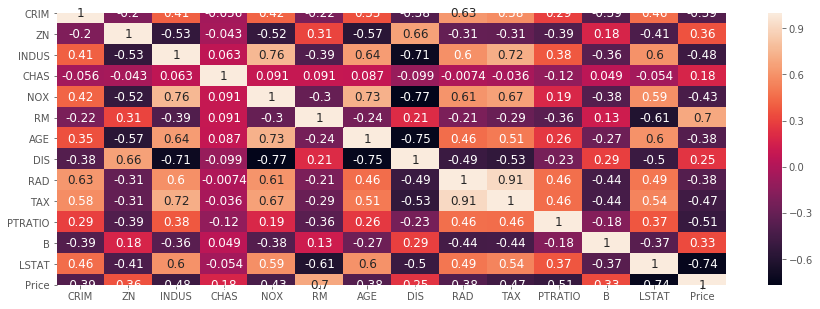

In [21]:
fig, ax = plt.subplots(figsize = (15,5))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [22]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values b, annot=True)

![skewness](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/skewness.jpg)

**Infer: To the above jupyter notebook, add a section where you use inferential
statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t. You should
explain and discuss your findings within the notebook. This part is also worth
20%.**


In [23]:
# Read in the housing dataset into a pandas dataframe called df
df = pd.read_csv("https://raw.githubusercontent.com/fionanealon/datasets/master/housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
# Add a new column called 'River' and assign it's values as integers of the values contained in the 'CHAS' column
df['RIVER'] = df['CHAS'].astype(np.int)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,RIVER
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


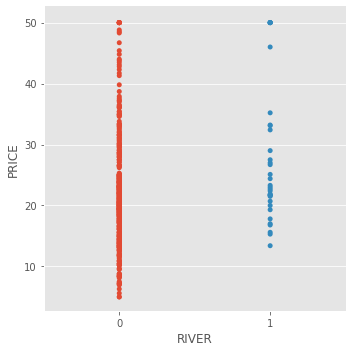

In [25]:
sns.catplot(x='RIVER', y='PRICE', jitter=False, data=df)

In [26]:
# Find the mean of the 'on river' and 'not on river classes' contained in the 'River' column
df.groupby('RIVER').mean().PRICE 

RIVER
0    22.093843
1    28.440000
Name: PRICE, dtype: float64

In [27]:
# Find the median of the 'on river' and 'not on river classes' contained in the 'River' column
df.groupby('RIVER').median().PRICE 

RIVER
0    20.9
1    23.3
Name: PRICE, dtype: float64

In [28]:
# Find the median of the 'on river' and 'not on river classes' contained in the 'River' column
df.groupby('RIVER').std().PRICE 

RIVER
0     8.831362
1    11.816643
Name: PRICE, dtype: float64

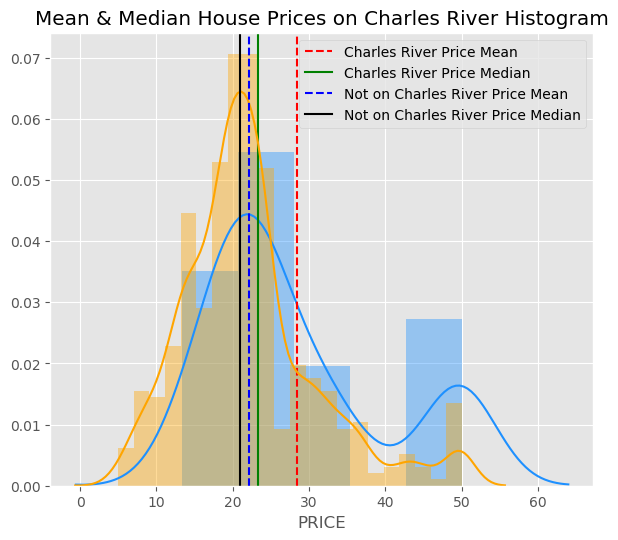

In [29]:
# Create a kernel density plot for the on charles river and not on charles river populations in the 'Price' column
# Adapted from https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
f, (ax_hist) = plt.subplots(figsize=(7,6), dpi=100)

# Set the parameters for the two populations
rivermean=28.44
rivermedian=23.3
notonrivermean=22.09
notonrivermedian=20.9

# Create a 'distplot' for the on charles river and not on charles river populations in the'Price' column
# Adapted from https://stackoverflow.com/questions/51417483/mean-median-mode-lines-showing-only-in-last-graph-in-seaborn
sns.distplot( df.loc[df.RIVER == 1, "PRICE"],  ax=ax_hist , color="dodgerblue", label="On Charles River")
ax_hist.axvline(rivermean, color='r', linestyle='--')
ax_hist.axvline(rivermedian, color='g', linestyle='-')

sns.distplot( df.loc[df.RIVER == 0, "PRICE"],  ax=ax_hist , color="orange", label="Not On Charles River")
ax_hist.axvline(notonrivermean, color='b', linestyle='--')
ax_hist.axvline(notonrivermedian, color='k', linestyle='-')

# Add a legend to the plot
plt.legend({'Charles River Price Mean':rivermean,'Charles River Price Median':rivermedian, 'Not on Charles River Price Mean':notonrivermean, 'Not on Charles River Price Median':notonrivermedian})

# Add a title to the plot
plt.title('Mean & Median House Prices on Charles River Histogram')

# Display the plot
plt.show()

In [30]:
# Assign the 'on river' prices to variable o
o = df[df['RIVER'] == 1]['PRICE']
# Assign the 'not on river' prices to variable n
n = df[df['RIVER'] == 0]['PRICE']

In [31]:
# Using the kurtosis subpackage from the scip stats package, calculate the kurtosis of the 'on river' population
kurtosis(o)

-0.5438936600086546

In [32]:
# Using the kurtosis subpackage from the scip stats package, calculate the kurtosis of the 'on river' population
kurtosis(n)

1.512342873001833

In [33]:
# Using the skew subpackage from the scipy stats package, calculate the skew of the 'on river' population
skew(o)

0.9021059082456354

In [34]:
# Using the skew subpackage from the scip stats package, calculate the skew of the 'not on river' population
skew(n)

1.0535392064190594

In [35]:
ss.mannwhitneyu(o, n)

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

In [36]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
mann = df[['RIVER', 'PRICE']]

In [37]:
mann['RANK']=df['PRICE'].rank(ascending=1)
mann

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RIVER,PRICE,RANK
0,0,24.0,350.5
1,0,21.6,264.5
2,0,34.7,455.0
3,0,33.4,451.5
4,0,36.2,465.5
...,...,...,...
501,0,22.4,293.5
502,0,20.6,236.5
503,0,23.9,347.0
504,0,22.0,281.0


In [38]:
rankriver = mann[mann['RIVER'] == 1]['RANK'].sum()

In [39]:
ranknotriver = mann[mann['RIVER'] == 0]['RANK'].sum()

In [40]:
countriver = mann[mann['RIVER'] == 1]['RANK'].count()

In [41]:
countnotriver = mann[mann['RIVER'] == 0]['RANK'].count()

In [42]:
1-((0.95))**12

0.45963991233736334

In [43]:
ss.f_oneway(o, n)

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

***
$$
z = (x – μ) / (σ / √n)
$$

In [44]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x = df[['RIVER', 'PRICE']]

![keras](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/keras.JPG)

**(60%) Predict: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. This part is worth 60%.**


## What is a neural network?

A **neural network** is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. Neural networks are a key element in the concept of artificial intelligence. [Ref: Neural Network](https://www.investopedia.com/terms/n/neuralnetwork.asp)


**Keras** is a machine learning library for python which assists in creating neural networks, training neural networks, making predictions in neural networks and evalutaing these neural networks.

**Layer** is a general term that applies to a collection of 'nodes' operating together at a specific depth within a neural network.

The **input layer** is contains your raw data (you can think of each variable as a 'node').

The **hidden layer(s)** are where the black magic happens in neural networks. Each layer is trying to learn different aspects about the data by minimizing an error/cost function. The most intuitive way to understand these layers is in the context of 'image recognition' such as a face. The first layer may learn edge detection, the second may detect eyes, third a nose, etc. This is not exactly what is happening but the idea is to break the problem up in to components that different levels of abstraction can piece together much like our own brains work (hence the name 'neural networks').

The **output layer** is the simplest, usually consisting of a single output for classification problems. Although it is a single 'node' it is still considered a layer in a neural network as it could contain multiple nodes. [Ref:Layers of a Neural Network](https://stackoverflow.com/questions/35345191/what-is-a-layer-in-a-neural-network)

See below diagram of a neural network which visualsises it's input, hidden and output layers.

![neural](https://raw.githubusercontent.com/fionanealon/Boston-Housing-dataset/master/images/neural.png)

## Load data

In [45]:
# Read in the housing.csv file into a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/fionanealon/datasets/master/housing.csv")
# Take a look at the first 5 lines of the df dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Assess the Boston housing dataset features

### Distribution

In the below graph, see a visual representation of the distributions of the features of the Boston housing dataset. The plot contains 14 histograms. A histogram is a graphical display where the data is grouped into ranges and then plotted as bars. The height of each bar shows how many are in each range. [Ref: Histogram](https://www.mathsisfun.com/definitions/histogram.html)


Upon review of the distributions within my plot, I can see that the distributions for a lot of features are highly skewed e.g. CRIM and ZN. These features would not be favorable features to include in our neural network. Features such as the RM feature would be more suitable as this histogram contains a normal distibution. Other favorable features include TAX, DIS, PTRATIO and LSTAT as their distributions are not highly skewed. 

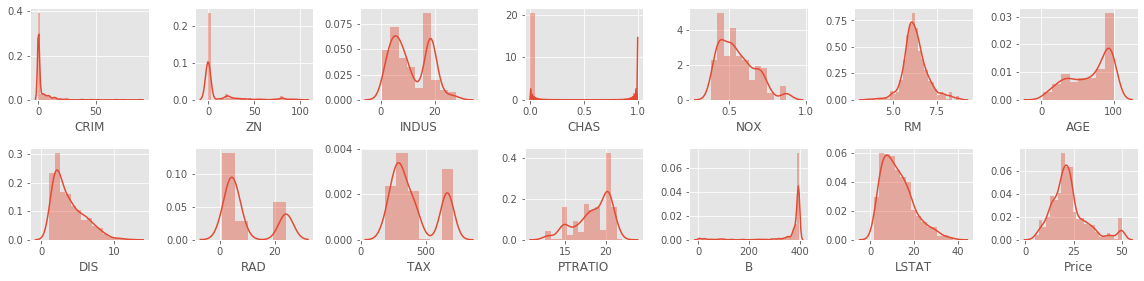

In [46]:
# include distplot for all features in one plot which 2 rows long & 7 columns wide
rows = 2
cols = 7

# Plot the features
fig, ax  = plt.subplots(nrows= rows, ncols= cols, figsize = (16,4))

# Assign col to dataframe columns
col = data.columns
index = 0

# loop through the dataframe and create a plot for each feature
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1


# Show plot in tight layout
plt.tight_layout()

### Correlation

Upon review of the distributions of the features, I have observed that the most favorable inputs to include in my neurol network would be RM, PTRATIO and LSTAT. The reason why I have chosen these features is because their distributions are close to normal. Features with normal distributions are preferred is because these features have a high chance of being correlated with the target variable which also has a normal distribution. In this section, I will calculate the correlation of these features to validate my observation. 

The below correlation matrix which shows the relationship between the variables in the Boston housing dataset. Any value greater than 0 indicates a relationship between two variables. LSTAT has a correlation value of -0.73 with Price, RM has a correlation value of 0.69 with Price and PTRATIO has a correlation value of 0.69 with Price which suggests they have a string relationship with the target variable Price.

#### Correlation Matrix

In [47]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In the below block of code, I have called a function called getCorrelatedFeature to loop through all the correlated values in Price and to find all values above a .50 threshold. The values which were returned include - RM, LSTAT and PTRATIO.

In [48]:
# Define a function called getCorrelatedFeature with variables corrdata and threshold
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    # Loop through the correlation matrix and find correlation values greater than threshold variable
    for i, index in enumerate(corrdata.index):
         if abs(corrdata[index])> threshold:
                feature.append(index)
                value.append(corrdata[index])
    
    # Stores these values in a pandas dataframe
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [49]:
# Assign a value of 0.50 to the variable threshold
threshold = 0.50
# Assign the correlated values obtained from the getCorrelatedFeature function to variable corrvalue
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
# Take a look at corr_value
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


#### Correlation pairplot

In this section, I will create a pairplot of the correlated values above the threshold 0.50. This plot will provide a visual representation of the relationship between the 'RM', 'PTRATIO', 'LSTAT features and 'Price'. 'RM' and 'LSTAT' are showing a linear relationship with 'Price'. 'PTRATIO' isn't showing a linear relationship but is providing some information for predicting Price.

In [50]:
# Display features contained in corr value array
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [51]:
# Assign corr value data to correlated data variable
correlated_data = data[corr_value.index]
# Take a look at correlated_data
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


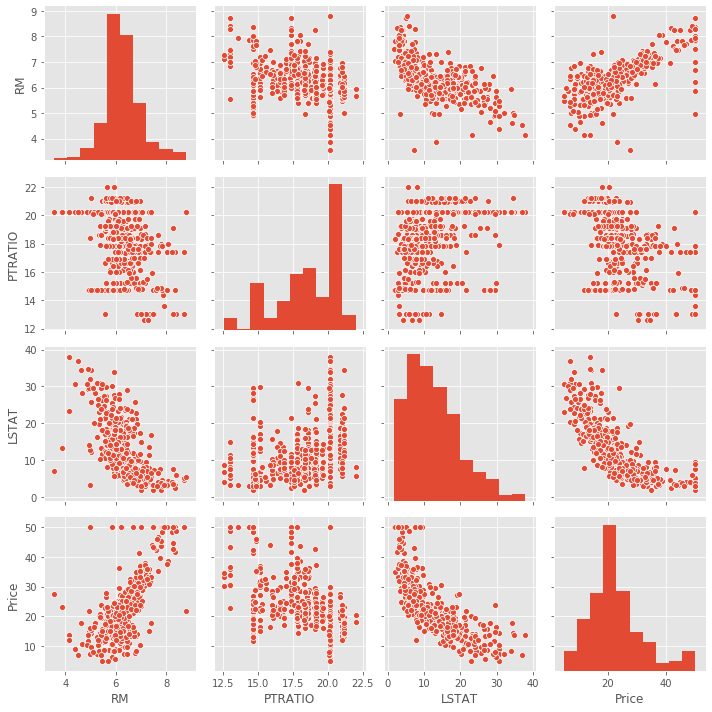

In [52]:
# From Seaborn, create a pairplot of correlated_data
sns.pairplot(correlated_data)
# Show the plot
plt.tight_layout()

#### Heatmap

In the below plot, I have created a heatmap of correlated data. A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. [Ref: Heatmap](https://www.optimizely.com/optimization-glossary/heatmap/)

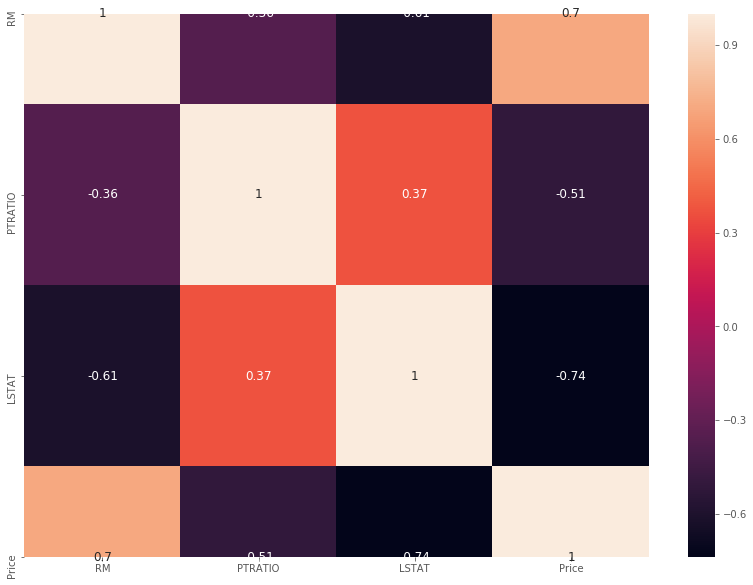

In [53]:
# Create a heatmap of correlated_data
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size':12})

### Linear Regression

#### Build a linear regression model

$$ Price = t (RM) + u (PTRATIO) + v (LSTAT) + c $$

In [54]:
# Select inputs for the regression model
x = df[['RM', 'PTRATIO', 'LSTAT']]

In [55]:
# Select output for the regression model
y = df[['PRICE']]

In [56]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [57]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Here's our intercept - c
m.intercept_

array([18.56711151])

In [59]:
# Here's our coefficients, in order.
m.coef_

array([[ 4.51542094, -0.93072256, -0.57180569]])

#### R-squared

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs. [Ref: R-squared](https://www.investopedia.com/terms/r/r-squared.asp)

An r-squared score is considered is considered to be good when it is close to zero. Therforefore, the r-squared score of 0.67 calculated in our linear regression model below is considered to be very good.

In [60]:
# See how good our fit is.
m.score(x, y)

0.6786241601613111

In [61]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 13 Dec 2019   Prob (F-statistic):          2.69e-123
Time:                        18:29:15   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.0

C:\Users\fiona\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Building and training the neural network

### Inputs

In the above section, I have reviewed the boston dataset features and I have selected 'RM', 'PTRATIO', 'LSTAT' as my inputs to my training model because of their correlation with price.

In [62]:
# Create some input values with the RM, PTRATIO and LSTAT columns of the housing dataframe
inputs = df[['RM', 'PTRATIO', 'LSTAT']]
# Take a look at the first 5 values of inputs
inputs.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


### Output

I have selected 'Price' as the output of my training model as this is the target variable.

In [63]:
# Create output values with the PRICE column of the housing dataframe
output = df[['PRICE']]
output.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [64]:
inputs_train, inputs_test, output_train, output_test = mod.train_test_split(inputs, output, test_size=0.3)

### Idea

The neural network will turn three floating point inputs into one "floating point" output.

$$ [6.575, 15.3, 4.98] \rightarrow [24.0] 
$$

### Building and training

To train the inputs and output of my neural network, I will create a sequential neural network. By creating a sequential neural network, I will build the layers of the network up one by one. 

I will add 2 layers to my neural network. The first layer will have a dimension of 3 because I have 3 inputs - RM, LSTAT and PTRATIO. I will add 20 neurons to the first layer and I will add one neuron to the final layer as we only require one output - Price.

An activation function of "relu" has also been added to the first layer. In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. [Ref:Activation function](https://en.wikipedia.org/wiki/Activation_function). "Relu" stands for rectified linear unit, and is a type of activation function. ReLU is the most commonly used activation function in neural networks. [Ref:Relu](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7)

The model is compiled using the loss function "mean squared error". Mean squared error is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes. [Ref:Mean Squared error](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

In [65]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In the below code snippet, I will fit the inputs and output train variables to the neural network and I'll do this 100 times in batch sizes of 10.

In [66]:
# Train the model
m.fit(inputs_train, output_train, epochs=100, batch_size=10, verbose=0)

After training the neural network in the input and output values, pass the input_test values through the network and ask it to predict the corresponding output values.

In [67]:
# Run each inputs_test value through the neural network
m.predict(inputs_test).round().T

array([[36., 32., 17., 20., 16., 16., 30., 25., 39., 33., 13., 28., 18.,
        17., 29., 30., 19., 17., 20., 18., 11., 28., 19., 17., 18., 20.,
        17., 21., 15., 23., 20., 32., 17., 17., 41., 26., 31., 18., 33.,
        15., 18., 22., 15., 28., 27., 40., 11., 17., 18., 17., 16., 33.,
        24.,  7., 30., 20., 29., 19.,  9., 24., 33., 27., 18., 19., 24.,
        15., 14., 15., 15., 15., 22., 17., 34., 19., 18., 22., 25., 39.,
        10., 22., 18., 16., 24., 30., 19., 24., 18., 19., 28., 24., 23.,
        20., 15., 33., 31., 10., 17., 37., 25., 18., 24., 18., 16., 18.,
        31., 30., 32.,  8., 18., 27., 27., 19., 10., 17., 32., 18., 17.,
        22., 17., 32., 18., 23., 12., 37., 18., 34., 25., 18., 31., 29.,
        19., 41., 17., 23., 17., 20., 32., 16., 18., 18., 38., 19., 11.,
        22., 29., 28., 36., 18., 25., 18., 16., 25.]], dtype=float32)

In [68]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[33.4, 41.3,  8.4, 30.7, 17.5, 16.2, 34.6, 22. , 43.8, 37.2,  7.2,
        23.1, 14.3, 18.4, 22.2, 24.6, 20.6, 18.7, 16.1, 21.1, 13.4, 32.2,
        21.2, 17.4, 22.7, 17.5, 18.3, 17.8, 19.1, 23.9, 21.4, 22.8, 16.6,
        27.9, 21.9, 30.3, 31.6, 12.6, 33.2,  8.8, 20.3, 19. , 13.3, 36.5,
        25.2, 50. , 10.4, 17.8, 14.9, 20.8, 23.2, 33.4, 22.2, 14.4, 29.4,
        19.3, 36. , 21.7,  8.1, 21.4, 31.2, 24.4, 22.9, 17.1, 22.6, 18.5,
        13.6, 27.5, 13.1, 15.2, 20.3, 18.8, 50. , 19.5, 16. , 18.2, 11.9,
        50. ,  5. , 23.1, 13.1, 13.6, 28.1, 32.5, 19.6, 18.6, 16.2, 16.7,
        20.7, 24.5, 19.8, 21.7, 21.7, 34.9, 28. ,  9.7, 21.7, 42.3, 16.5,
        17. , 22. , 11.7, 17.8, 27.5, 25. , 24.1, 30.8,  7.4, 20.4, 27.1,
        23.8, 29.6, 16.5, 18.9, 27.9, 21.5, 13. , 23. , 15.2, 32.7, 19.7,
        24.3, 20. , 46.7, 19.1, 32.9, 24.1, 16.7, 29.8, 26.2, 20.1, 50. ,
        22. , 20.2, 17.6, 22.7, 23.6, 13.4, 10.9, 24.5, 46. , 19.3, 23.1,
        20.5, 26.6, 23. , 48.8, 15.4, 

#### Evaluate

In [69]:
# Find the average mean price for evaluation
m.evaluate(inputs_test, output_test)

152/152 [==============================] - 0s 278us/step


27.732043416876543

In [70]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Scaling

The preprocessing.scale() algorithm puts your data on one scale. This is helpful with largely sparse datasets. In simple words, your data is vastly spread out. It is calculated by subtracting the population mean from an individual raw score and then dividing the difference by the population standard deviation [Ref: Scale](https://stackoverflow.com/questions/42325212/what-preprocessing-scale-do-how-does-it-work/42332663)

I'm going to add pre.StandardScaler() to my model to see if it improves my prediction.

In [71]:
# Assign the sklearn preprocessing Standard Scaler to the variable scaler
scaler = pre.StandardScaler()
# Fit inputs_train
scaler.fit(inputs_train)
# Assign the scaled inputs_train values to the variable inputs_train_scaled
inputs_train_scaled = scaler.transform(inputs_train)

In [72]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [73]:
# Train the model
m.fit(inputs_train_scaled, output_train, epochs=100, batch_size=10, verbose=0)

In [74]:
# Run each scaled_inputs_test values through the neural network
inputs_test_scaled = scaler.transform(inputs_test)
m.predict(inputs_test).round().T

array([[57., 40., 26., 14., 38., 41., 28., 34., 53., 49., 20., 52., 38.,
        45., 57., 56., 47., 28., 45., 39., 15., 33., 39., 22., 27., 43.,
        31., 35., 30., 37., 39., 53., 44., 47., 55., 23., 44., 38., 46.,
        31., 38., 50., 34., 25., 49., 44., 24., 38., 35., 43., 34., 47.,
        46., 27., 45., 38., 26., 46., 24., 45., 50., 46., 27., 44., 42.,
        32., 34., 61., 25., 36., 46., 30., 27., 42., 40., 52., 56., 47.,
        23., 41., 36., 35., 44., 48., 44., 47., 41., 40., 55., 45., 39.,
        43., 19., 48., 53., 26., 22., 43., 35., 21., 34., 40., 29., 31.,
        53., 50., 53., 25., 45., 38., 51., 35., 16., 45., 55., 22., 32.,
        48., 37., 40., 31., 47., 23., 50., 41., 48., 34., 33., 42., 51.,
        32., 47., 38., 48., 42., 47., 48., 25., 41., 40., 44., 42., 49.,
        45., 49., 54., 30., 33., 51., 31., 24., 40.]], dtype=float32)

In [75]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[33.4, 41.3,  8.4, 30.7, 17.5, 16.2, 34.6, 22. , 43.8, 37.2,  7.2,
        23.1, 14.3, 18.4, 22.2, 24.6, 20.6, 18.7, 16.1, 21.1, 13.4, 32.2,
        21.2, 17.4, 22.7, 17.5, 18.3, 17.8, 19.1, 23.9, 21.4, 22.8, 16.6,
        27.9, 21.9, 30.3, 31.6, 12.6, 33.2,  8.8, 20.3, 19. , 13.3, 36.5,
        25.2, 50. , 10.4, 17.8, 14.9, 20.8, 23.2, 33.4, 22.2, 14.4, 29.4,
        19.3, 36. , 21.7,  8.1, 21.4, 31.2, 24.4, 22.9, 17.1, 22.6, 18.5,
        13.6, 27.5, 13.1, 15.2, 20.3, 18.8, 50. , 19.5, 16. , 18.2, 11.9,
        50. ,  5. , 23.1, 13.1, 13.6, 28.1, 32.5, 19.6, 18.6, 16.2, 16.7,
        20.7, 24.5, 19.8, 21.7, 21.7, 34.9, 28. ,  9.7, 21.7, 42.3, 16.5,
        17. , 22. , 11.7, 17.8, 27.5, 25. , 24.1, 30.8,  7.4, 20.4, 27.1,
        23.8, 29.6, 16.5, 18.9, 27.9, 21.5, 13. , 23. , 15.2, 32.7, 19.7,
        24.3, 20. , 46.7, 19.1, 32.9, 24.1, 16.7, 29.8, 26.2, 20.1, 50. ,
        22. , 20.2, 17.6, 22.7, 23.6, 13.4, 10.9, 24.5, 46. , 19.3, 23.1,
        20.5, 26.6, 23. , 48.8, 15.4, 

#### Evaluate

In [76]:
# Find the average mean price for evaluation
m.evaluate(inputs_test_scaled, output_test)

152/152 [==============================] - 0s 253us/step


19.13746818743254

In [77]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Whitening

 The dec.PCA() algorithm is a common way of speeding up a machine learning algorithm by using Principal Component Analysis (PCA). It involves a process called "Whitening" which is a method of removing some of the correlations between variables in a standardised way. I'm also going to try adding this to my model to see if this improves the results of my prediction.

In [78]:
# Assign the sklearn decomposition PCA function to the variable pca
pca = dec.PCA(n_components=3, whiten=True)
# Fit inputs_train
pca.fit(inputs_train)
# Assign the whitened inputs_train values to the variable inputs_train_white
inputs_train_white = pd.DataFrame(pca.transform(inputs_train), columns=inputs.columns)

In [79]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [80]:
# Train the model
m.fit(inputs_train_white, output_train, epochs=100, batch_size=10, verbose=0)

In [81]:
# Run each inputs_test_white value through the neural network
inputs_test_white = scaler.transform(inputs_test)
m.predict(inputs_test).round().T

array([[ 70.,  57., 110.,  66.,  91., 102.,  52.,  63.,  68.,  68., 137.,
         77.,  93.,  97.,  78.,  75.,  86.,  88.,  86.,  83., 123.,  62.,
         81.,  73.,  68.,  79.,  86.,  92., 109.,  66.,  77.,  70.,  95.,
         88.,  76.,  54.,  68.,  94.,  69., 106.,  87.,  84., 112.,  55.,
         73.,  56., 134., 103.,  97.,  92., 100.,  71.,  75., 170.,  65.,
         72.,  54.,  90., 147.,  76.,  67.,  74.,  70.,  93.,  72.,  98.,
        112.,  87., 116., 101.,  77.,  87.,  53.,  89.,  89.,  87.,  84.,
         56., 149.,  77.,  95.,  99.,  76.,  69.,  88.,  74.,  80.,  91.,
         79.,  78.,  70.,  88., 102.,  65.,  73., 131.,  78.,  56.,  66.,
         74.,  67.,  92.,  94., 100.,  78.,  71.,  70., 157.,  93.,  65.,
         77.,  80., 137.,  95.,  73.,  72., 100.,  84., 103.,  60.,  78.,
         78., 116.,  66.,  92.,  65.,  61.,  99.,  59.,  74.,  75.,  66.,
         88.,  83.,  85.,  86.,  68., 113.,  91.,  86.,  57.,  77.,  98.,
         79.,  72.,  77.,  52.,  99., 

In [82]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[33.4, 41.3,  8.4, 30.7, 17.5, 16.2, 34.6, 22. , 43.8, 37.2,  7.2,
        23.1, 14.3, 18.4, 22.2, 24.6, 20.6, 18.7, 16.1, 21.1, 13.4, 32.2,
        21.2, 17.4, 22.7, 17.5, 18.3, 17.8, 19.1, 23.9, 21.4, 22.8, 16.6,
        27.9, 21.9, 30.3, 31.6, 12.6, 33.2,  8.8, 20.3, 19. , 13.3, 36.5,
        25.2, 50. , 10.4, 17.8, 14.9, 20.8, 23.2, 33.4, 22.2, 14.4, 29.4,
        19.3, 36. , 21.7,  8.1, 21.4, 31.2, 24.4, 22.9, 17.1, 22.6, 18.5,
        13.6, 27.5, 13.1, 15.2, 20.3, 18.8, 50. , 19.5, 16. , 18.2, 11.9,
        50. ,  5. , 23.1, 13.1, 13.6, 28.1, 32.5, 19.6, 18.6, 16.2, 16.7,
        20.7, 24.5, 19.8, 21.7, 21.7, 34.9, 28. ,  9.7, 21.7, 42.3, 16.5,
        17. , 22. , 11.7, 17.8, 27.5, 25. , 24.1, 30.8,  7.4, 20.4, 27.1,
        23.8, 29.6, 16.5, 18.9, 27.9, 21.5, 13. , 23. , 15.2, 32.7, 19.7,
        24.3, 20. , 46.7, 19.1, 32.9, 24.1, 16.7, 29.8, 26.2, 20.1, 50. ,
        22. , 20.2, 17.6, 22.7, 23.6, 13.4, 10.9, 24.5, 46. , 19.3, 23.1,
        20.5, 26.6, 23. , 48.8, 15.4, 

#### Evaluate

In [83]:
# Find the average mean price for evaluation
m.evaluate(inputs_test, output_test)

152/152 [==============================] - 0s 255us/step


4616.7952688116775

In [84]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Add more neurons

In a further attempt to improve the prediction results of my model, I'm going to try adding more neurons to the first layer.

In [85]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(100, input_dim=3, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model
m.compile(loss="mean_squared_error", optimizer="adam")

In [86]:
# Train the model
m.fit(inputs_train, output_train, epochs=100, batch_size=10,verbose=0)

In [87]:
# Run each inputs_test_white value through the neural network
m.predict(inputs_test).round().T

array([[36., 33., 16., 23., 15., 14., 32., 25., 39., 32., 14., 26., 18.,
        16., 27., 29., 19., 17., 21., 18., 13., 29., 20., 18., 20., 20.,
        17., 22., 13., 23., 20., 31., 16., 17., 41., 29., 31., 17., 33.,
        13., 18., 20., 12., 30., 26., 42., 10., 15., 17., 16., 15., 32.,
        23.,  8., 30., 20., 31., 19.,  9., 23., 32., 26., 20., 19., 24.,
        13., 11., 11., 14., 13., 21., 16., 36., 19., 17., 20., 23., 41.,
        10., 22., 18., 15., 23., 29., 19., 22., 18., 19., 26., 23., 22.,
        20., 15., 33., 30.,  9., 17., 39., 25., 19., 24., 18., 15., 18.,
        29., 29., 31.,  9., 18., 27., 26., 19., 14., 16., 31., 19., 16.,
        21., 15., 33., 19., 22., 11., 38., 17., 34., 25., 17., 31., 28.,
        20., 43., 17., 22., 17., 20., 32., 15., 18., 18., 40., 19.,  8.,
        21., 28., 27., 39., 17., 23., 18., 15., 25.]], dtype=float32)

In [88]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[33.4, 41.3,  8.4, 30.7, 17.5, 16.2, 34.6, 22. , 43.8, 37.2,  7.2,
        23.1, 14.3, 18.4, 22.2, 24.6, 20.6, 18.7, 16.1, 21.1, 13.4, 32.2,
        21.2, 17.4, 22.7, 17.5, 18.3, 17.8, 19.1, 23.9, 21.4, 22.8, 16.6,
        27.9, 21.9, 30.3, 31.6, 12.6, 33.2,  8.8, 20.3, 19. , 13.3, 36.5,
        25.2, 50. , 10.4, 17.8, 14.9, 20.8, 23.2, 33.4, 22.2, 14.4, 29.4,
        19.3, 36. , 21.7,  8.1, 21.4, 31.2, 24.4, 22.9, 17.1, 22.6, 18.5,
        13.6, 27.5, 13.1, 15.2, 20.3, 18.8, 50. , 19.5, 16. , 18.2, 11.9,
        50. ,  5. , 23.1, 13.1, 13.6, 28.1, 32.5, 19.6, 18.6, 16.2, 16.7,
        20.7, 24.5, 19.8, 21.7, 21.7, 34.9, 28. ,  9.7, 21.7, 42.3, 16.5,
        17. , 22. , 11.7, 17.8, 27.5, 25. , 24.1, 30.8,  7.4, 20.4, 27.1,
        23.8, 29.6, 16.5, 18.9, 27.9, 21.5, 13. , 23. , 15.2, 32.7, 19.7,
        24.3, 20. , 46.7, 19.1, 32.9, 24.1, 16.7, 29.8, 26.2, 20.1, 50. ,
        22. , 20.2, 17.6, 22.7, 23.6, 13.4, 10.9, 24.5, 46. , 19.3, 23.1,
        20.5, 26.6, 23. , 48.8, 15.4, 

In [89]:
# Find the average mean price for evaluation
m.evaluate(inputs_test, output_test)

152/152 [==============================] - 0s 275us/step


23.928817247089587

In [90]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Add new inputs

In [96]:
# Create some input values with the RM, PTRATIO and LSTAT columns of the housing dataframe
newinputs = df[['INDUS', 'NOX', 'TAX', 'RM', 'PTRATIO', 'LSTAT']]
# Take a look at the first 5 values of inputs
newinputs.head()

,INDUS,NOX,TAX,RM,PTRATIO,LSTAT
0,2.31,0.538,296,6.575,15.3,4.98
1,7.07,0.469,242,6.421,17.8,9.14
2,7.07,0.469,242,7.185,17.8,4.03
3,2.18,0.458,222,6.998,18.7,2.94
4,2.18,0.458,222,7.147,18.7,5.33


In [98]:
newinputs_train, newinputs_test, output_train, output_test = mod.train_test_split(newinputs, output, test_size=0.3)

In [101]:
# Create a new neural network.
m = kr.models.Sequential()

# Add neurons
m.add(kr.layers.Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
m.add(kr.layers.Dense(1, kernel_initializer='normal'))                     

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [102]:
# Train the model
m.fit(newinputs_train, output_train, epochs=100, batch_size=10,verbose=0)

In [104]:
# Run each inputs_test value through the neural network
m.predict(newinputs_test).round().T

array([[20.,  5., 29., 20., 33., 28., 24.,  9., 21., 26., 14., 18., 18.,
        23., 32., 26., 15., 29., 25., 14., 24., 37., 24., 35., 15., 25.,
        36., 24., 34., 26., 17., 14., 18., 15., 18., 31., 25., 10., 21.,
        33., 28., 13., 11., 24., 13., 25.,  4., 26., 23., 14., 32., 15.,
        16., 25., 22., 28., 17., 13.,  6., 30., 26.,  6., 27., 26., 20.,
        22., 11., 15., 36., 33., 32., 29., 29., 27., 22., 37., 32.,  7.,
        27., 17., 16., 34., 37., 31., 15., 28., 17., 16., 21., 31., 26.,
        18., 14., 13., 15., 17., 16., 20., 24., 16., 23., 30., 21., 24.,
        16., 30., 27., 30., 30., 29., 13., 16., 35., 20., 30., 25., 20.,
        15., 29., 26., 18., 28., 33., 21., 11., 14., 15., 22., 25., 29.,
        21., 29., 20., 26., 30., 24., 32., 19., 25., 29.,  8., 34., 23.,
        17., 24., 16., 18., 17., 20.,  6., 20., 12.]], dtype=float32)

In [107]:
# Add the output values to numpy array
output_test.as_matrix().astype(np.float32).T

C:\Users\fiona\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[22.3,  8.8, 23.3, 24.3, 37.2, 23.4, 24.4, 23.7, 22.2, 18.7, 19.1,
        17.4, 24.5, 20.8, 26.6, 22.2, 14.1, 24.4, 18.2, 17.3, 23.9, 38.7,
        18.5, 34.7, 27.5, 24.5, 33.4, 22. , 36.2, 26.7, 16.4, 19.4, 16. ,
        16.7, 17.8, 35.4, 28.7, 12.3, 20.2, 42.3, 22.9, 27.1, 11.3, 21.2,
        15.2, 24.3, 17.9, 30.1, 20.5, 17.1, 31.5, 16.1, 19.9, 22.6, 22.6,
        21.1, 10.4, 13.8, 11.8, 26.5, 22.3, 14.6, 20.6, 36. , 19.6, 19.3,
        15.4, 15.6, 28.5, 43.5, 23.6, 24.8, 25.2, 30.1, 22.6, 44.8, 36.1,
        16.5, 24.6, 19.1, 19.8, 35.4, 34.9, 20.7, 17. , 23.5, 20.6, 21.5,
        23.2, 33.1, 19. , 18.8,  8.4, 13.4, 13.5, 23.8, 17.5, 20.4, 20.6,
        14.3, 22. , 29.1, 21.2, 19.6, 19.3, 24.2, 23.9, 50. , 22.8, 22.1,
        13.9, 19.5, 29.6, 21. , 26.6, 18.6, 21.4, 18.4, 23.8, 21.6, 27.9,
        23.7, 50. , 21.4, 16.3, 18.5, 23.1, 15. , 19.5, 25. , 24. , 37. ,
        21.2, 34.6, 25. , 24.8, 33.2, 16.6, 24.3, 23.7, 13.4, 32.4, 50. ,
        20. , 22.8, 16.8, 22.7, 20. , 

#### Evaluate

In [109]:
# Find the average mean price for evaluation
m.evaluate(newinputs_test, output_test)

152/152 [==============================] - 0s 256us/step


33.023431276020254

In [110]:
# Use pandas to calculate the average price of 'PRICE'
df[['PRICE']].mean()

PRICE    22.532806
dtype: float64

### Conclusion

### End